<h1><font color="#113D68" size=6>Deep Learning con Python y Keras</font></h1>

<h1><font color="#113D68" size=5>Parte 6. Redes Neuronales Recurrentes</font></h1>

<h1><font color="#113D68" size=4>3. LSTM para Regresión</font></h1>

<br><br>
<div style="text-align: right">
<font color="#113D68" size=3>Manuel Castillo Cara</font><br>

</div>

---

<a id="indice"></a>
<h2><font color="#004D7F" size=5>Índice</font></h2>

* [0. Contexto](#section0)
* [1. LSTM para regresión](#section1)
    * [1.1. Cargar el dataset](#section1.1)
    * [1.2. Normalización de datos](#section1.2)
    * [1.3. Train/Test](#section1.3)
    * [1.4. Creamos el dataset para una serie temporal](#section1.4)
    * [1.5. Transformar las muestras](#section1.5)
    * [1.6. Diseño de LSTM](#section1.6)
    * [1.7. Resultados](#section1.7)
* [2. LSTM usando ventana](#section2)
* [3. LSTM con pasos de tiempo](#section3)
* [4. LSTM con memoria entre batchs](#section4)
    * [4.1. Generar estado en train](#section4.1)
    * [4.2. Diseño de LSTM](#section4.2)
* [5. Stacked LSTM con memoria entre batchs](#section5)

---
<a id="section0"></a>
# <font color="#004D7F" size=6> 0. Contexto</font>

La red LSTM es un tipo de red neuronal recurrente que se utiliza en el Deep Learning porque se pueden entrenar con éxito arquitecturas muy grandes.

Por tanto, en esta lección trabajaremos:
* Desarrollar LSTM para un problema de regresión con secuencialidad temporal.
* Desarrollar redes LSTM usando una ventana y pasos de tiempo.
* Desarrollar y hacer predicciones que mantienen el estado (memoria) en secuencias muy largas.

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section1"></a>
# <font color="#004D7F" size=6>1. LSTM para regresión</font>

El problema que veremos en esta lección es el problema de predicción de pasajeros de aerolíneas internacionales.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Más información sobre el dataset [Air Passengers](https://www.kaggle.com/chirag19/air-passengers)

<a id="section1.1"></a>
# <font color="#004D7F" size=5>1.1. Cargar el dataset</font>

Cargamos el dataset

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# load the dataset
dataframe = pd.read_csv('https://raw.githubusercontent.com/FMunyoz/colab/main/data/international-airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

<a id="section1.2"></a>
# <font color="#004D7F" size=5>1.2. Normalización de datos</font>

Las LSTM son sensibles a la escala de los datos de entrada, específicamente cuando se utilizan las funciones de activación Sigmoidea (predeterminada) o Tanh, por lo que una normalización nos otroga resultados más prometedores.

In [37]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)


<a id="section1.3"></a>
# <font color="#004D7F" size=5>1.3. Train/Test</font>

Dividimos el conjunto de datos en train/test

In [38]:
# split into train and test sets
train_size=int(len(dataset) * .67)
train_test=len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset), :]


<a id="section1.4"></a>
# <font color="#004D7F" size=5>1.4. Creamos el dataset para una serie temporal</font>

Utilizamos la funcion `create_dataset()` para adaptar nuestro dataset a una serie temporal

In [39]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


<a id="section1.5"></a>
# <font color="#004D7F" size=5>1.5. Transformar las muestras</font>

La red LSTM espera que los datos de entrada (X) se proporcionen con una estructura de matriz específica en forma de: $[muestras,\ pasos\ de\ tiempo,\ características]$. 

Nuestros datos preparados tienen la forma: $[muestras,\ características]$ por lo que requiere esta transformación.

In [40]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


<a id="section1.6"></a>
# <font color="#004D7F" size=5>1.6. Diseño de LSTM</font>

Creamos nuestra LSTM:
1. Una capa visible con 1 entrada
2. Una capa oculta con 4 bloques LSTM o neuronas
3. Una capa de salida que hace una predicción de valor único. LSTM utiliza por defecto la función Sigmoidal.
4. Entrenamos para 100 épocas y el tamaño de batch a 1.

In [41]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)


Epoch 1/100
94/94 - 1s - loss: 0.0535
Epoch 2/100
94/94 - 0s - loss: 0.0278
Epoch 3/100
94/94 - 0s - loss: 0.0193
Epoch 4/100
94/94 - 0s - loss: 0.0172
Epoch 5/100
94/94 - 0s - loss: 0.0161
Epoch 6/100
94/94 - 0s - loss: 0.0153
Epoch 7/100
94/94 - 0s - loss: 0.0143
Epoch 8/100
94/94 - 0s - loss: 0.0133
Epoch 9/100
94/94 - 0s - loss: 0.0124
Epoch 10/100
94/94 - 0s - loss: 0.0118
Epoch 11/100
94/94 - 0s - loss: 0.0106
Epoch 12/100
94/94 - 0s - loss: 0.0096
Epoch 13/100
94/94 - 0s - loss: 0.0087
Epoch 14/100
94/94 - 0s - loss: 0.0079
Epoch 15/100
94/94 - 0s - loss: 0.0071
Epoch 16/100
94/94 - 0s - loss: 0.0063
Epoch 17/100
94/94 - 0s - loss: 0.0057
Epoch 18/100
94/94 - 0s - loss: 0.0050
Epoch 19/100
94/94 - 0s - loss: 0.0044
Epoch 20/100
94/94 - 0s - loss: 0.0039
Epoch 21/100
94/94 - 0s - loss: 0.0035
Epoch 22/100
94/94 - 0s - loss: 0.0031
Epoch 23/100
94/94 - 0s - loss: 0.0028
Epoch 24/100
94/94 - 0s - loss: 0.0026
Epoch 25/100
94/94 - 0s - loss: 0.0024
Epoch 26/100
94/94 - 0s - loss: 0.

<a id="section1.7"></a>
# <font color="#004D7F" size=5>1.7. Resultados</font>

A continuación se representa el cógido para representar los resultados.

Puntuacion Entrenamiento: 22.70 RMSE
Puntuacion Validación: 50.02 RMSE


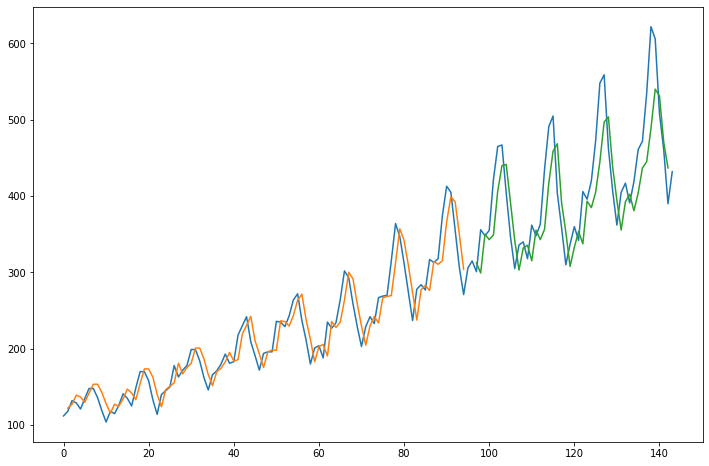

In [42]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
print('Puntuacion Entrenamiento: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print('Puntuacion Validación: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[: , :] = np.nan
trainPredictPlot[look_back : len(trainPredict) + look_back, :] = trainPredict


# shift test predictions for plotting

testPredictPlot = np.empty_like(dataset)
testPredictPlot[: , :] = np.nan
testPredictPlot[len(trainPredict) + (look_back*2) + 1 : len(dataset) -1 , :] = testPredict

# plot baseline and predictions
plt.figure(figsize=(12,8))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


Podemos ver que el modelo tiene un error promedio de aproximadamente 23 pasajeros (en miles) en el conjunto de datos de entrenamiento y aproximadamente 52 pasajeros (en miles) en el conjunto de datos de prueba. 

No está tan mal pero vamos a intentar mejorarlo

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section2"></a>
# <font color="#004D7F" size=6>2. LSTM usando ventana</font>

Recordemos lo que estuviemos viendo, dado el tiempo actual _(t)_ que queremos predecir el valor en el próximo tiempo en la secuencia _(t + 1),_ podemos usar el tiempo actual _(t)_ así como los dos tiempos anteriores _(t-1_ y _t-2)_ como variables de entrada. Cuando se expresa como un problema de regresión, las variables de entrada son _t-2, t-1, t_ y la variable de salida es _t + 1._

Este proceso quedaría:
```
    X1  X2  X3  Y
    112 118 132 129
    118 132 129 121
    132 129 121 135
    129 121 135 148
    121 135 148 148 
```

Por tanto únicamente cambiamos el tamaño de ventana al proceso realizado anteriormente con la función `create_dataset()`.

Epoch 1/100
92/92 - 1s - loss: 0.0206
Epoch 2/100
92/92 - 0s - loss: 0.0065
Epoch 3/100
92/92 - 0s - loss: 0.0051
Epoch 4/100
92/92 - 0s - loss: 0.0042
Epoch 5/100
92/92 - 0s - loss: 0.0038
Epoch 6/100
92/92 - 0s - loss: 0.0035
Epoch 7/100
92/92 - 0s - loss: 0.0032
Epoch 8/100
92/92 - 0s - loss: 0.0033
Epoch 9/100
92/92 - 0s - loss: 0.0031
Epoch 10/100
92/92 - 0s - loss: 0.0030
Epoch 11/100
92/92 - 0s - loss: 0.0030
Epoch 12/100
92/92 - 0s - loss: 0.0030
Epoch 13/100
92/92 - 0s - loss: 0.0029
Epoch 14/100
92/92 - 0s - loss: 0.0029
Epoch 15/100
92/92 - 0s - loss: 0.0029
Epoch 16/100
92/92 - 0s - loss: 0.0028
Epoch 17/100
92/92 - 0s - loss: 0.0028
Epoch 18/100
92/92 - 0s - loss: 0.0028
Epoch 19/100
92/92 - 0s - loss: 0.0027
Epoch 20/100
92/92 - 0s - loss: 0.0027
Epoch 21/100
92/92 - 0s - loss: 0.0027
Epoch 22/100
92/92 - 0s - loss: 0.0027
Epoch 23/100
92/92 - 0s - loss: 0.0027
Epoch 24/100
92/92 - 0s - loss: 0.0026
Epoch 25/100
92/92 - 0s - loss: 0.0027
Epoch 26/100
92/92 - 0s - loss: 0.

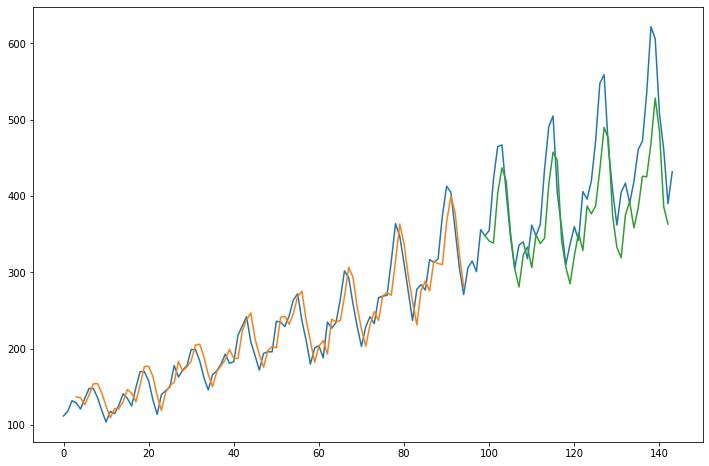

In [43]:
# reshape into X=t and Y=t+1
look_back = 3

trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
print('Puntuacion Entrenamiento: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print('Puntuacion Validación: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[: , :] = np.nan
trainPredictPlot[look_back : len(trainPredict) + look_back, :] = trainPredict


# shift test predictions for plotting

testPredictPlot = np.empty_like(dataset)
testPredictPlot[: , :] = np.nan
testPredictPlot[len(trainPredict) + (look_back*2) + 1 : len(dataset) -1 , :] = testPredict

# plot baseline and predictions
plt.figure(figsize=(12,8))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section3"></a>
# <font color="#004D7F" size=6>3. LSTM con pasos de tiempo</font>

En lugar de redactar las observaciones pasadas como características de entrada separadas, podemos usarlas como pasos de tiempo de la característica de una entrada, que de hecho es un encuadre más preciso del problema. Podemos hacer esto usando la misma representación de datos que en el ejemplo anterior basado en ventanas, excepto que cuando cambiamos la forma de los datos, configuramos las columnas para que sean la dimensión de pasos de tiempo y cambiamos la dimensión de características de nuevo a 1. 

```python
    trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
    testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
```

Epoch 1/100
92/92 - 0s - loss: 0.0593
Epoch 2/100
92/92 - 0s - loss: 0.0239
Epoch 3/100
92/92 - 0s - loss: 0.0187
Epoch 4/100
92/92 - 0s - loss: 0.0164
Epoch 5/100
92/92 - 0s - loss: 0.0148
Epoch 6/100
92/92 - 0s - loss: 0.0129
Epoch 7/100
92/92 - 0s - loss: 0.0114
Epoch 8/100
92/92 - 0s - loss: 0.0097
Epoch 9/100
92/92 - 0s - loss: 0.0085
Epoch 10/100
92/92 - 0s - loss: 0.0075
Epoch 11/100
92/92 - 0s - loss: 0.0066
Epoch 12/100
92/92 - 0s - loss: 0.0058
Epoch 13/100
92/92 - 0s - loss: 0.0052
Epoch 14/100
92/92 - 0s - loss: 0.0052
Epoch 15/100
92/92 - 0s - loss: 0.0046
Epoch 16/100
92/92 - 0s - loss: 0.0045
Epoch 17/100
92/92 - 0s - loss: 0.0046
Epoch 18/100
92/92 - 0s - loss: 0.0042
Epoch 19/100
92/92 - 0s - loss: 0.0044
Epoch 20/100
92/92 - 0s - loss: 0.0043
Epoch 21/100
92/92 - 0s - loss: 0.0042
Epoch 22/100
92/92 - 0s - loss: 0.0042
Epoch 23/100
92/92 - 0s - loss: 0.0042
Epoch 24/100
92/92 - 0s - loss: 0.0042
Epoch 25/100
92/92 - 0s - loss: 0.0042
Epoch 26/100
92/92 - 0s - loss: 0.

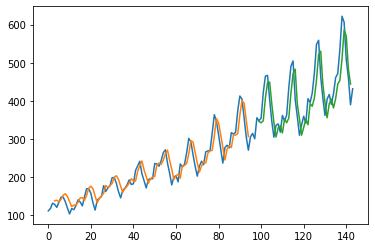

In [ ]:
# reshape into X=t and Y=t+1
???

# reshape input to be [samples, time steps, features]
???

# create and fit the LSTM network
???

# make predictions
???

# invert predictions
???

# calculate root mean squared error
???

# shift train predictions for plotting
???

# shift test predictions for plotting
???

# plot baseline and predictions
???


---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section4"></a>
# <font color="#004D7F" size=6>4. LSTM con memoria entre batchs</font>

La red LSTM tiene memoria que es capaz de recordar secuencias largas. 

<a id="section4.1"></a>
# <font color="#004D7F" size=5>4.1. Generar estado en train</font>

Normalmente, el estado dentro de la red se restablece después de cada batch, así como con cada llamada a `model.predict()` o `model.evaluate()`. Podemos obtener un control más preciso sobre cuándo se borra el estado interno de la red LSTM haciendo que la capa LSTM tenga estado (parámetro `stateful`). 

Por tanto, requerimos que los datos de entrenamiento no se mezclen al ajustar la red y un restablecimiento explícito del estado de la red después época mediante llamadas a la función `model.reset states()`.

In [ ]:
# reshape into X=t and Y=t+1
???

# reshape input to be [samples, time steps, features]
???

# create and fit the LSTM network
???


92/92 - 0s - loss: 0.0042
92/92 - 0s - loss: 0.0098
92/92 - 0s - loss: 0.0075
92/92 - 0s - loss: 0.0060
92/92 - 0s - loss: 0.0051
92/92 - 0s - loss: 0.0046
92/92 - 0s - loss: 0.0044
92/92 - 0s - loss: 0.0043
92/92 - 0s - loss: 0.0043
92/92 - 0s - loss: 0.0042
92/92 - 0s - loss: 0.0042
92/92 - 0s - loss: 0.0042
92/92 - 0s - loss: 0.0041
92/92 - 0s - loss: 0.0041
92/92 - 0s - loss: 0.0041
92/92 - 0s - loss: 0.0041
92/92 - 0s - loss: 0.0040
92/92 - 0s - loss: 0.0040
92/92 - 0s - loss: 0.0040
92/92 - 0s - loss: 0.0040
92/92 - 0s - loss: 0.0039
92/92 - 0s - loss: 0.0039
92/92 - 0s - loss: 0.0039
92/92 - 0s - loss: 0.0039
92/92 - 0s - loss: 0.0038
92/92 - 0s - loss: 0.0038
92/92 - 0s - loss: 0.0038
92/92 - 0s - loss: 0.0038
92/92 - 0s - loss: 0.0037
92/92 - 0s - loss: 0.0037
92/92 - 0s - loss: 0.0037
92/92 - 0s - loss: 0.0037
92/92 - 0s - loss: 0.0037
92/92 - 0s - loss: 0.0036
92/92 - 0s - loss: 0.0036
92/92 - 0s - loss: 0.0036
92/92 - 0s - loss: 0.0036
92/92 - 0s - loss: 0.0036
92/92 - 0s -

<a id="section4.2"></a>
# <font color="#004D7F" size=5>4.2. Diseño de LSTM</font>

Finalmente, cuando se construye la capa LSTM, el parámetro `stateful` debe establecerse en `True` y, en lugar de especificar,mediante el parámetro `batch_input_shape`:
1. Las dimensiones de entrada
2. Codificar el número de muestras en un batch
3. El número de pasos de tiempo en una muestra y 
4. El número de características en un paso de tiempo. 

Por ejemplo: 
```python
    model.add(LSTM(4, batch_input_shape = (batch_size, look_back, 1), stateful = True))
```

Este mismo tamaño de batch debe usarse más adelante al evaluar el modelo y hacer predicciones. 

```python
    model.predict(trainX, batch_size = batch_size)
```

92/92 - 0s - loss: 0.0052
92/92 - 0s - loss: 0.0103
92/92 - 0s - loss: 0.0075
92/92 - 0s - loss: 0.0059
92/92 - 0s - loss: 0.0051
92/92 - 0s - loss: 0.0047
92/92 - 0s - loss: 0.0045
92/92 - 0s - loss: 0.0044
92/92 - 0s - loss: 0.0044
92/92 - 0s - loss: 0.0043
92/92 - 0s - loss: 0.0043
92/92 - 0s - loss: 0.0042
92/92 - 0s - loss: 0.0042
92/92 - 0s - loss: 0.0042
92/92 - 0s - loss: 0.0042
92/92 - 0s - loss: 0.0041
92/92 - 0s - loss: 0.0041
92/92 - 0s - loss: 0.0041
92/92 - 0s - loss: 0.0040
92/92 - 0s - loss: 0.0040
92/92 - 0s - loss: 0.0040
92/92 - 0s - loss: 0.0040
92/92 - 0s - loss: 0.0039
92/92 - 0s - loss: 0.0039
92/92 - 0s - loss: 0.0039
92/92 - 0s - loss: 0.0039
92/92 - 0s - loss: 0.0038
92/92 - 0s - loss: 0.0038
92/92 - 0s - loss: 0.0038
92/92 - 0s - loss: 0.0037
92/92 - 0s - loss: 0.0037
92/92 - 0s - loss: 0.0037
92/92 - 0s - loss: 0.0037
92/92 - 0s - loss: 0.0036
92/92 - 0s - loss: 0.0036
92/92 - 0s - loss: 0.0036
92/92 - 0s - loss: 0.0036
92/92 - 0s - loss: 0.0035
92/92 - 0s -

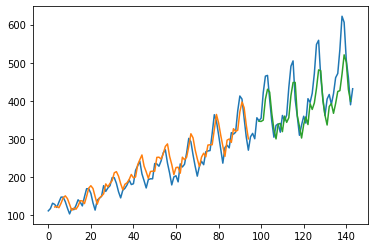

In [ ]:
# reshape into X=t and Y=t+1
???

# reshape input to be [samples, time steps, features]
???

# create and fit the LSTM network
???

    
# make predictions
???


# invert predictions
???


# calculate root mean squared error
???


# shift train predictions for plotting
???


# shift test predictions for plotting
???


# plot baseline and predictions
???


---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section5"></a>
# <font color="#004D7F" size=6>5. Stacked LSTM con memoria entre batchs</font>

Las redes LSTM se pueden apilar de la misma manera que se pueden apilar otros tipos de capas. Una adición a la configuración que se requiere es que una capa LSTM antes de cada capa LSTM subsiguiente debe devolver la secuencia. 

Esto se puede hacer configurando el parámetro `return_sequences` en la capa a `True`.

```python
    model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
    model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
```

92/92 - 0s - loss: 0.0047
92/92 - 0s - loss: 0.0188
92/92 - 0s - loss: 0.0131
92/92 - 0s - loss: 0.0099
92/92 - 0s - loss: 0.0077
92/92 - 0s - loss: 0.0064
92/92 - 0s - loss: 0.0058
92/92 - 0s - loss: 0.0056
92/92 - 0s - loss: 0.0054
92/92 - 0s - loss: 0.0053
92/92 - 0s - loss: 0.0052
92/92 - 0s - loss: 0.0052
92/92 - 0s - loss: 0.0051
92/92 - 0s - loss: 0.0051
92/92 - 0s - loss: 0.0050
92/92 - 0s - loss: 0.0050
92/92 - 0s - loss: 0.0049
92/92 - 0s - loss: 0.0048
92/92 - 0s - loss: 0.0048
92/92 - 0s - loss: 0.0047
92/92 - 0s - loss: 0.0047
92/92 - 0s - loss: 0.0046
92/92 - 0s - loss: 0.0046
92/92 - 0s - loss: 0.0045
92/92 - 0s - loss: 0.0044
92/92 - 0s - loss: 0.0044
92/92 - 0s - loss: 0.0043
92/92 - 0s - loss: 0.0042
92/92 - 0s - loss: 0.0042
92/92 - 0s - loss: 0.0041
92/92 - 0s - loss: 0.0040
92/92 - 0s - loss: 0.0040
92/92 - 0s - loss: 0.0039
92/92 - 0s - loss: 0.0038
92/92 - 0s - loss: 0.0037
92/92 - 0s - loss: 0.0037
92/92 - 0s - loss: 0.0036
92/92 - 0s - loss: 0.0035
92/92 - 0s -

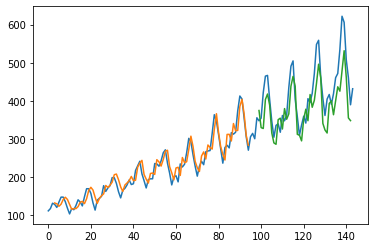

In [ ]:
# reshape into X=t and Y=t+1
???

# reshape input to be [samples, time steps, features]
???

# create and fit the LSTM network
???
  
# make predictions
???

# invert predictions
???

# calculate root mean squared error
???

# shift train predictions for plotting
???

# shift test predictions for plotting
???

# plot baseline and predictions
???


<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#004D7F"></i> </font></div>